In [1]:
%matplotlib inline
import yfinance as yf
import pandas as pd
from IPython.core.debugger import set_trace

In [2]:
assets = {
    '278420.KS' : 'arirang_esg', 
    '279540.KS' : 'kodex_lowvol', #이건 사실 코덱스다 
    '244660.KS' : 'kodex_qual_plus', #이건 코덱스임
    '244670.KS' : 'kodex_value_plus', #이건 코덱스
    '279530.KS' : 'kodex_dvd_high', 
    '102110.KS' : 'tiger200', 
    '170350.KS' : 'tiger_beta_plus', 
    '217790.KS' : 'tiger_contrarian', 
    '211560.KS' : 'tiger_dvd_growth', 
    '123320.KS' : 'tiger_lev', 
    '147970.KS' : 'tiger_mtum', 
    '148070.KS' : 'kosef_ktb10y',
    '167860.KS' : 'kosef_ktb10y_lev'
}

In [3]:
symbols = ' '.join(assets.keys())
start = '2008-12-20'
end = '2021-05-31'
db = yf.download(symbols, start=start, end=end, threads=True)['Adj Close']
db = db.rename(columns=assets).fillna(method='ffill')

[*********************100%***********************]  13 of 13 completed


In [4]:
db

,tiger200,tiger_lev,tiger_mtum,kosef_ktb10y,kosef_ktb10y_lev,tiger_beta_plus,tiger_dvd_growth,tiger_contrarian,kodex_qual_plus,kodex_value_plus,arirang_esg,kodex_dvd_high,kodex_lowvol
Date,,,,,,,,,,,,,
2008-12-22,15200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-23,14965.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-24,14670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-26,14595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-29,14695.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,42150.0,25655.0,24875.0,119855.0,127810.0,19885.0,19285.0,26005.0,11345.0,10690.0,9620.0,10055.0,12100.0
2021-05-25,42535.0,26095.0,24970.0,119770.0,127785.0,19885.0,19530.0,26370.0,11510.0,10880.0,9720.0,10095.0,12175.0
2021-05-26,42445.0,25975.0,24925.0,119790.0,127810.0,19885.0,19535.0,26445.0,11575.0,10920.0,9760.0,10125.0,12235.0


In [5]:
def rebuild(symbol, pkl='prices_kr.pkl'):
    market = db[symbol]
    
    if symbol in pd.read_pickle(pkl).reprice.unstack().columns:
        support = pd.read_pickle(pkl).reprice.unstack()[symbol].loc[market.index[0]:]
        df_r = pd.DataFrame({'support':support, 'market':market}).fillna(method='ffill').pct_change()
        df_p = (df_r.market.combine_first(df_r.support).fillna(0) + 1).cumprod()
        return df_p / df_p[-1] * market[-1]
    else:
        return market

<AxesSubplot:xlabel='Date'>

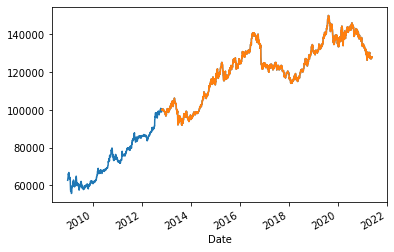

In [18]:
sym = 'kosef_ktb10y_lev'
rebuild(sym, pkl='prices_kr.pkl').plot()
db[sym].plot()

In [19]:
for name in assets.values():
    db[name] = rebuild(name, pkl='prices_kr.pkl')

In [20]:
pkl = pd.DataFrame()
pkl['close'] = db.stack()
pkl['high'] = db.stack()
pkl['low'] = db.stack()
pkl['underlying'] = db.stack()
pkl['reprice'] = db.stack(); pkl

close          high           low  \
Date                                                                    
2008-12-22 tiger200          15200.000000  15200.000000  15200.000000   
           tiger_lev          4917.293781   4917.293781   4917.293781   
           tiger_mtum         8589.253578   8589.253578   8589.253578   
           kosef_ktb10y      83555.730704  83555.730704  83555.730704   
           kosef_ktb10y_lev  62692.636864  62692.636864  62692.636864   
...                                   ...           ...           ...   
2021-05-28 kodex_qual_plus   11685.000000  11685.000000  11685.000000   
           kodex_value_plus  11015.000000  11015.000000  11015.000000   
           arirang_esg        9855.000000   9855.000000   9855.000000   
           kodex_dvd_high    10145.000000  10145.000000  10145.000000   
           kodex_lowvol      12230.000000  12230.000000  12230.000000   

                               underlying       reprice  
Date                                                     
2008-12-22 tiger200          15200.000000  15200.000000  
           tiger_lev          4917.293781   4917.293781  
           tiger_mtum         8589.253578   8589.253578  
           kosef_ktb10y      83555.730704  83555.730704  
           kosef_ktb10y_lev  62692.636864  62692.636864  
...                                   ...           ...  
2021-05-28 kodex_qual_plus   11685.000000  11685.000000  
           kodex_value_plus  11015.000000  11015.000000  
           arirang_esg        9855.000000   9855.000000  
           kodex_dvd_high    10145.000000  10145.000000  
           kodex_lowvol      12230.000000  12230.000000  

[39871 rows x 5 columns]

In [21]:
pkl.to_pickle('kr_20210531.pkl')